# Customer Churn Prediction for SyriaTel

### Overview

SyriaTel, a leading telecommunications provider, faces the challenge of customer churn—when users stop using their services. High churn negatively impacts revenue and increases customer acquisition costs. To remain competitive, it's essential for SyriaTel to identify customers who are at risk of leaving and take proactive steps to retain them.

## Business Understanding

Customer retention is a critical concern in the highly competitive telecommunications industry. For SyriaTel, losing customers to competitors not only results in immediate revenue loss but also increases the cost of acquiring new users to replace them. Since attracting new customers is often more expensive than retaining existing ones, improving customer loyalty directly enhances profitability and business sustainability.

The primary challenge is that customer churn is not always easy to predict using intuition alone. Customers may leave due to various reasons such as high service costs, poor network quality, dissatisfaction with customer service, or more attractive offers from competitors. These decisions often follow patterns in customer behavior that, if identified early, can allow the company to intervene proactively.

## Stakeholders

1. Customer Retention Team : Identify at-risk customers and implement personalized retention strategies.

2. Marketing Department : Design and execute targeted campaigns to improve customer engagement and satisfaction.

3. Customer Service Team : Improve customer experience by resolving issues early.

4. Product & Network Teams :Improve service quality, features, and coverage to enhance customer satisfaction.

5. Executive Leadership : Monitor churn trends, customer lifetime value, and ROI on retention efforts.



## Data Understanding

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
bigml_data = pd.read_csv ("bigml_data.csv")
bigml_data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [54]:
bigml_data.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [55]:
print(bigml_data.columns)


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [56]:
#  check if churn is a minority class
bigml_data['churn'].value_counts(normalize=True)


False    0.855086
True     0.144914
Name: churn, dtype: float64

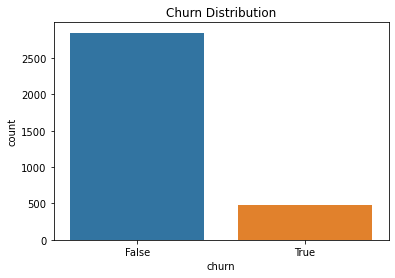

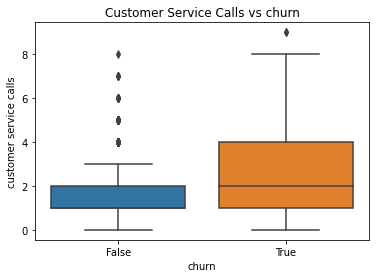

In [57]:
# Class distribution
sns.countplot(x='churn', data= bigml_data)
plt.title('Churn Distribution')
plt.show()

# Compare churn vs customer service calls
sns.boxplot(x='churn', y='customer service calls', data= bigml_data)
plt.title('Customer Service Calls vs churn')
plt.show()

In [58]:
# checking correlation and multicollinearity
bigml_data.corr()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


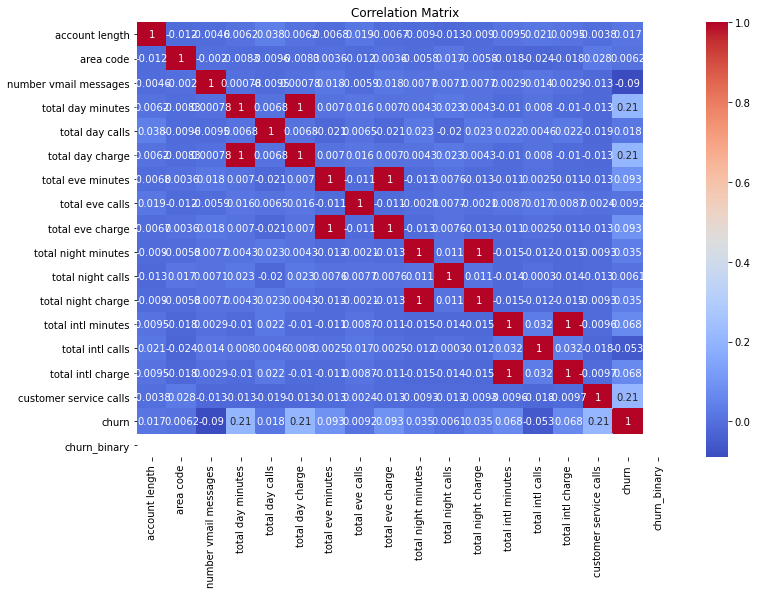

In [59]:
# Convert churn to binary first
bigml_data['churn_binary'] = bigml_data['churn'].map({'No': 0, 'Yes': 1})

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(bigml_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Graph Interpretation
Strong correlation between total day minutes and total day charge

Strong correlation between total night minutes and total night charge

Strong correlation between total eve minutes and total eve charge

Customers who call customer service more often are more likely to churn.

Higher usage (especially during the day) correlates with churn.

More voicemail messages is negatively correlated, perhaps indicating more engagement and lower churn.


<AxesSubplot:xlabel='churn', ylabel='account length'>

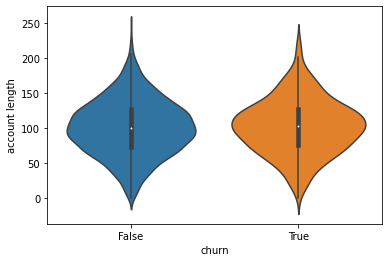

In [60]:
sns.violinplot(x='churn', y='account length', data=bigml_data)

## Data Cleaning

In [61]:
print(bigml_data.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
churn_binary              float64
dtype: object


In [62]:
# Checking categorical Values
categorical_cols = bigml_data.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['state', 'phone number', 'international plan', 'voice mail plan']


In [65]:
# Keep Churn column out if it's in the object columns
categorical_cols = [col for col in categorical_cols if col != 'Churn']

# One-hot encode
bigml_data_encoded = pd.get_dummies(bigml_data, columns=categorical_cols, drop_first=True)

In [66]:
#  Mapping Churn to binary
bigml_data_encoded ['Churn'] = bigml_data['churn'].map({'No': 0, 'Yes': 1, False: 0, True: 1})

In [73]:
# checking the encoded data
bigml_data_encoded.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes,Churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,1,0,0


In [71]:
print(bigml_data_encoded.dtypes)

account length              int64
area code                   int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
                           ...   
phone number_422-8344       uint8
phone number_422-9964       uint8
international plan_yes      uint8
voice mail plan_yes         uint8
Churn                       int64
Length: 3403, dtype: object
